In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('lion.jpg')

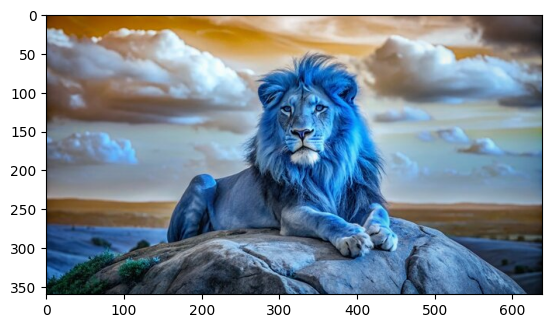

In [ ]:
plt.imshow(img)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

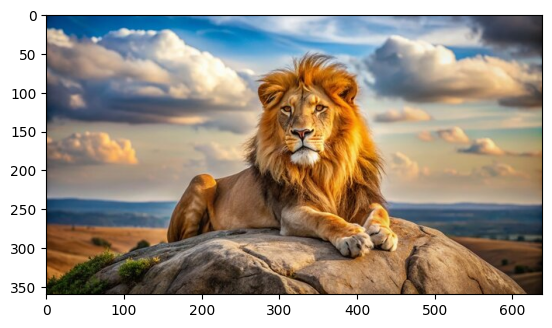

In [ ]:
plt.imshow(img_rgb)

In [ ]:
print("The image is of size : ",img_rgb.shape)

The image is of size :  (360, 639, 3)


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


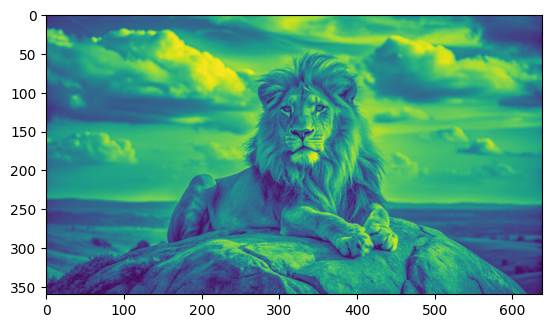

In [ ]:
plt.imshow(gray)
plt.show()

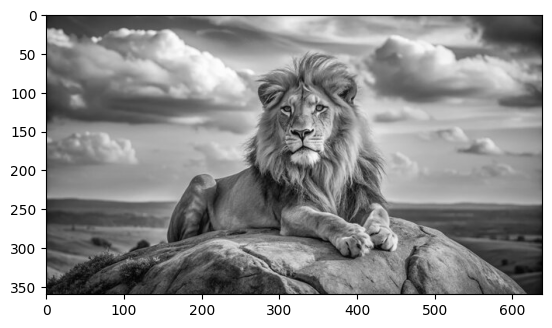

In [ ]:
plt.imshow(gray, cmap='gray')
plt.show()

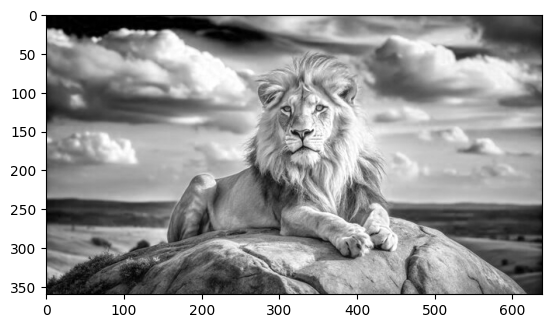

In [ ]:
plt.imshow(img_rgb[:,:,0],cmap='gray')
plt.show()

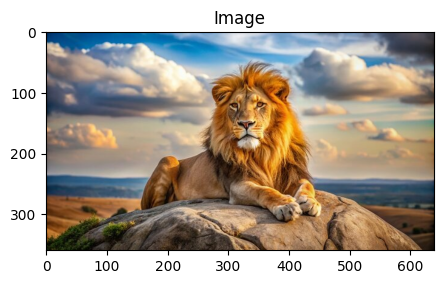

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.imshow(img_rgb)
ax.set_title("Image")
plt.show()

In [ ]:
resized = cv2.resize(img_rgb, (300, 300))

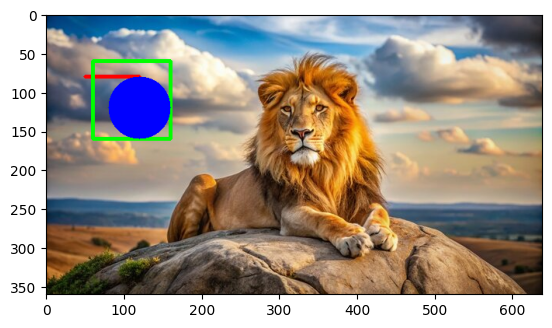

In [ ]:
lined_img= img_rgb.copy()
cv2.line(lined_img, (50, 80), (120, 80), (255, 0, 0), 4)
cv2.rectangle(lined_img, (60, 60), (160, 160), (0, 255, 0), 3)
cv2.circle(lined_img, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(lined_img)
plt.show()

### Modify the position of a liom
 in an image by manipulating its coordinates using NumPy

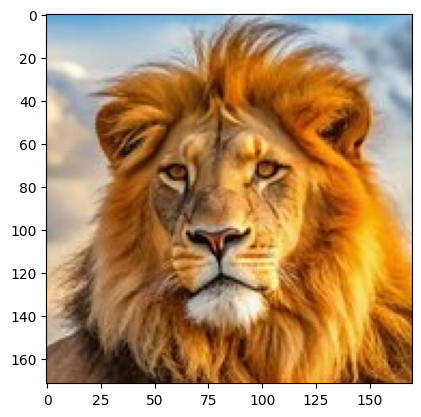

In [ ]:
plt.imshow(img_rgb[48:220,250:420])

In [ ]:
img_rgb[0:90,-90:] = img_rgb[:90,30:120]

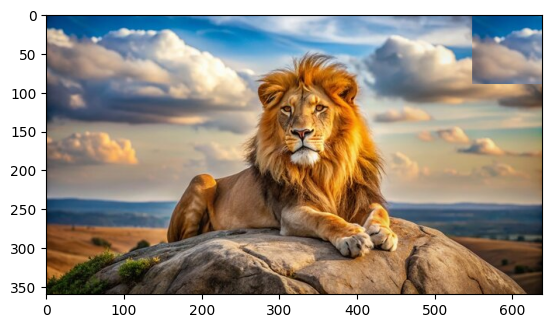

In [ ]:
plt.imshow(img_rgb)

### Increase the Brightness

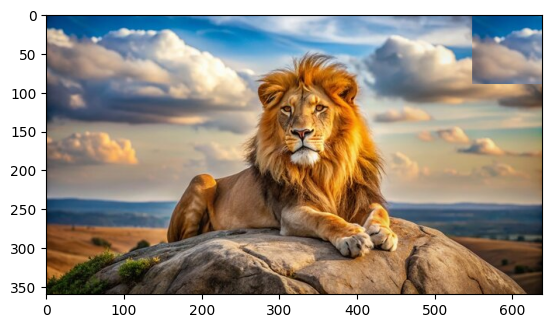

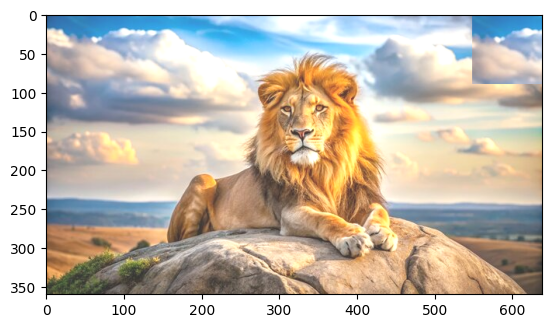

In [ ]:
image = img_rgb.copy()
bright_incr = 50

plt.imshow(image)
plt.show()
height = image.shape[0]
width = image.shape[1]
for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=min(image[i][j][k]+bright_incr,255)
plt.imshow(image)

# Inbuilt Function
brightened_image = cv2.add(image, bright_incr)

### Decrease the Brightness [Contrast]

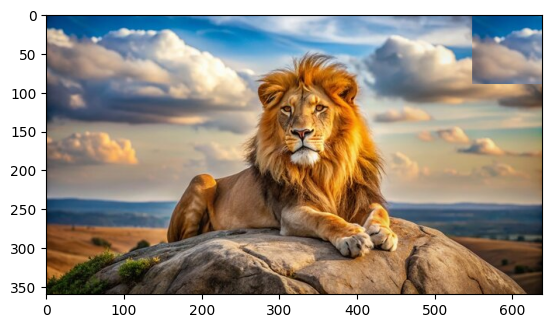

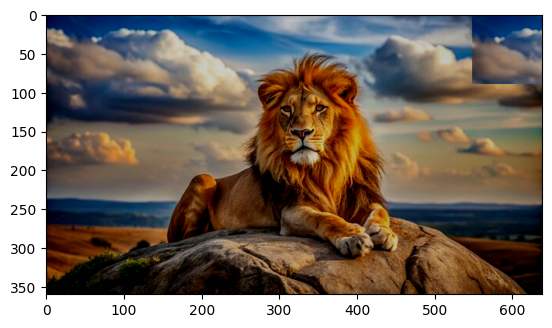

In [ ]:
image = img_rgb.copy()
bright_dec = 50

plt.imshow(image)
plt.show()

for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=max(image[i][j][k]-bright_incr,0)
plt.imshow(image)

# Inbuilt Function
contrasted_image = cv2.subtract(image, bright_dec)

### Histogram Equalization

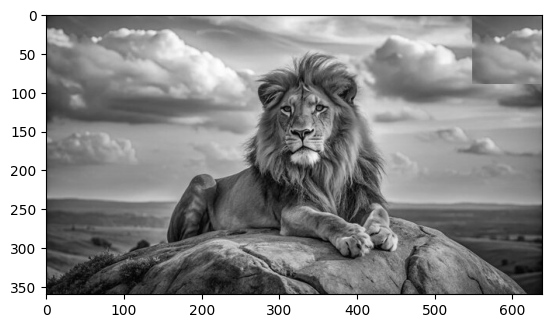

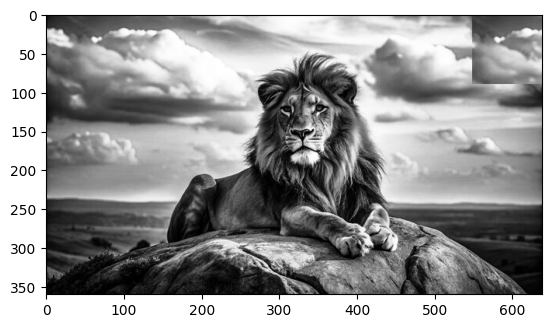

In [ ]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

equalized_image = cv2.equalizeHist(gray)
plt.imshow(equalized_image,cmap='gray')
plt.show()

### Simple Blur

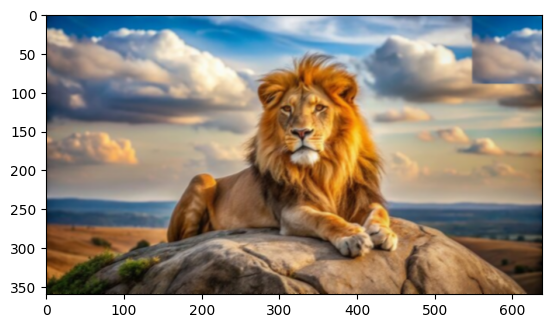

In [ ]:
# Average Filter / Simple Blur without library Function
image =img_rgb.copy()
for i in range(1,height-1):
    for j in range(1,width-1):
        for k in range(3):
            image[i][j][k]=np.average(image[i-1:i+2,j-1:j+2,k])
plt.imshow(image)

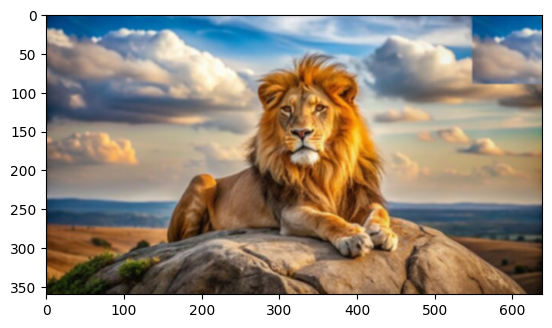

In [ ]:
simple_blur = cv2.blur(img_rgb,(3,3))
plt.imshow(simple_blur)

# GaussianBlur

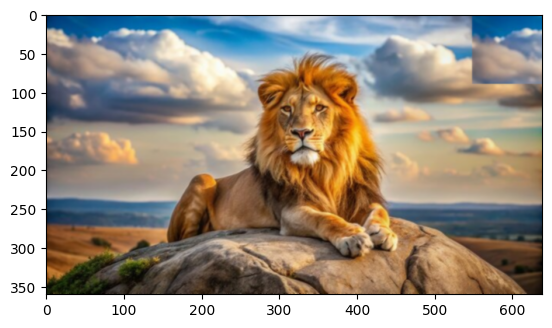

In [ ]:
# GaussianBlur Filter without library function
arr = np.array([[1,2,1],[2,4,2],[1,2,1]])
arr = arr / arr.sum()
image =img_rgb.copy()

for i in range(1, height-1):
    for j in range(1, width-1):
        for k in range(3):
            region = image[i-1:i+2, j-1:j+2, k]
            image[i, j, k] = np.sum(region * arr)

plt.imshow(image)

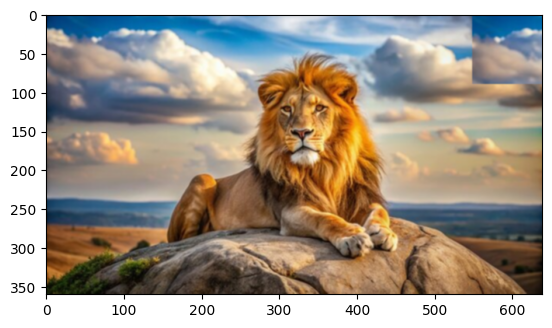

In [ ]:
# GaussianBlur Filter with library function
image = img_rgb.copy()
gb=cv2.GaussianBlur(image,(3,3),0)
plt.imshow(gb)

### Sharpening

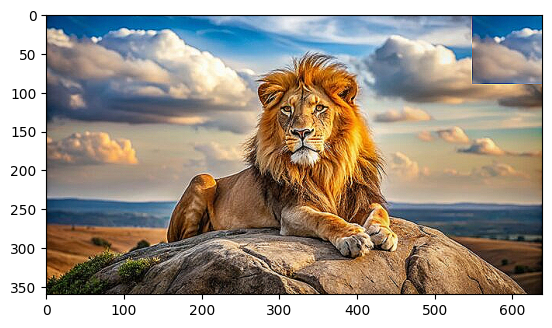

In [ ]:
sharpen = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(img_rgb, -1, sharpen)
plt.imshow(sharpened)
plt.show()

### Edge Detection

##### 1.Vertical Edges

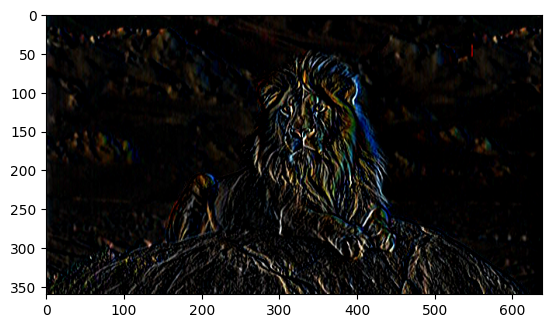

In [ ]:
ver_kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

ver_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=ver_kernel)
plt.imshow(ver_edg)


##### 2.Horizontal Edges

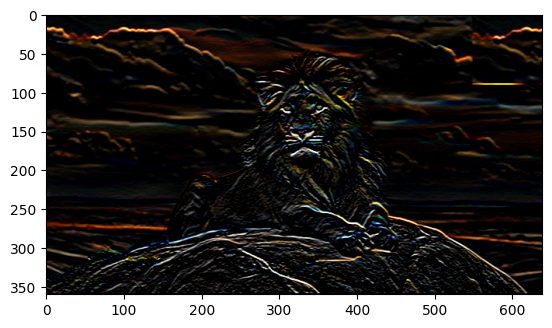

In [ ]:
hor_kernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

hor_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=hor_kernel)
plt.imshow(hor_edg)

### Take 2 images 1st - dog , 2nd - horse  and generate two new images having dog contains horse head and vice versa

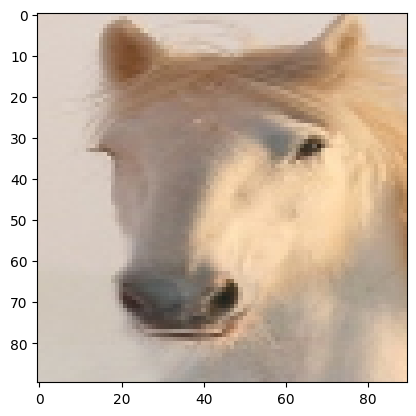

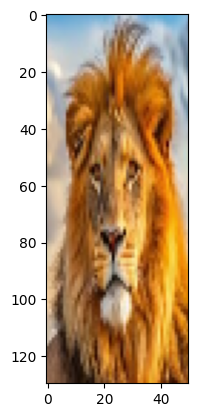

In [ ]:
cat =cv2.imread('lion.jpg')
horse = cv2.imread('horse.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
cat_face = cat[48:220,250:420]
horse_face= horse[200:450,530:650]
horse_face_resize=cv2.resize(horse_face,(90,90))
cat_face_resize=cv2.resize(cat_face,(50,130))

plt.imshow(horse_face_resize)
plt.show()
plt.imshow(cat_face_resize)


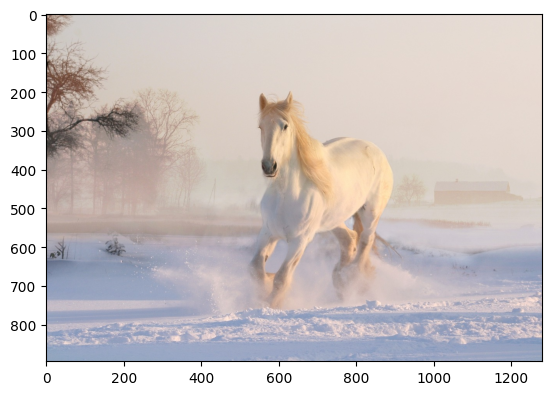

In [ ]:
plt.imshow(horse)

In [ ]:
 cat[40:70,20:120] =horse_face_resize
horse[50:160,150:200] =cat_face_resize
plt.imshow(horse)
plt.show()

ValueError: could not broadcast input array from shape (130,50,3) into shape (110,50,3)

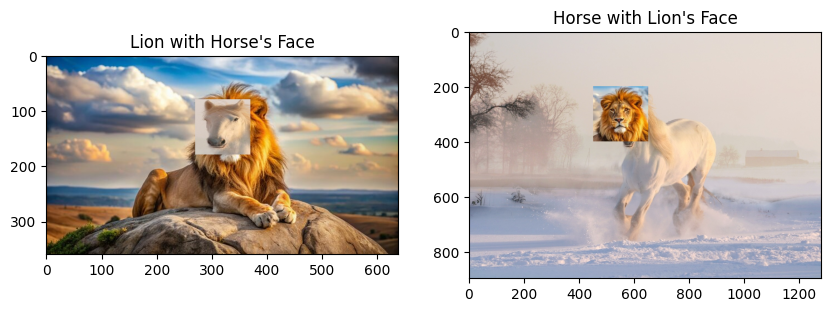

In [ ]:
cat =cv2.imread('lion.jpg')
horse = cv2.imread('horse.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
cat_face = cat[48:220, 250:420]  # Lion's face region
horse_face = horse[200:450, 530:650]  # Horse's face region

# Resize faces to fit correctly in the new locations
horse_face_resize = cv2.resize(horse_face, (100, 100))  # Resize to fit cat's face
cat_face_resize = cv2.resize(cat_face, (200, 200))  # Resize to fit horse's face

# Swap faces
cat[80:180, 270:370] = horse_face_resize  # Place horse's face on cat
horse[200:400, 450:650] = cat_face_resize  # Place cat's face on horse

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cat)
plt.title("Lion with Horse's Face")

plt.subplot(1, 2, 2)
plt.imshow(horse)
plt.title("Horse with Lion's Face")

plt.show()